# 1.4 신경망으로 문제를 풀다

### 1.4.1 스파이럴 데이터셋

In [34]:
# spiral.py 다운로드
import urllib
import os

download_path = "https://github.com"
file_name = download_path + "/WegraLee/deep-learning-from-scratch-2/raw/master/dataset/spiral.py"
save_path = os.path.join("..","datasets","spiral.py")

urllib.request.urlretrieve(file_name, save_path)

('..\\datasets\\spiral.py', <http.client.HTTPMessage at 0x262317bfbc8>)

In [35]:
import sys
sys.path.append("..") # 부모 디렉토리 추가
from datasets import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print("x", x.shape)
print("t", t.shape) # 정답 레이블 -> 원핫 벡터

x (300, 2)
t (300, 3)


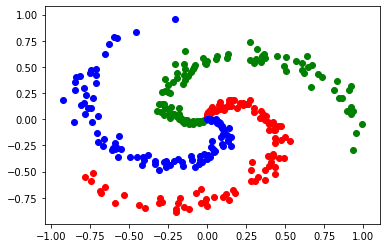

In [46]:
colors = ["r","g","b"]
for i in range(len(x)):
    plt.scatter(x=x[i,0],y=x[i,1], color=colors[t[i].argmax()])

비선형 데이터셋이기 때문에 선형 분류기로는 분류 불가능

## 1.4.2 신경망 구현
- hidden layer : 1

In [9]:
import sys
sys.path.append("..")
import numpy as np
from function.base_layer import Affine, Sigmoid, SoftmaxWithLoss

In [16]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I,H) # 표준편차 0.01로 맞춤
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)
        
        # 계층생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모음
        self.params, self.grads = [], []
        for layer in self.layers:
            # activation layer에서는 더해지는 param과 grads가 없음
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x # 예측값
    
    def forward(self,x,t):
        score = self.predict(x)
        loss = self.loss_layer.forward(t, score)
        return loss # 손실값
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers): # 역순으로 진행
            dout = layer.backward(dout)
        return dout

## 1.4.3 학습용 코드

In [22]:
import sys
sys.path.append("..")
import numpy as np
from datasets import spiral
import matplotlib.pyplot as plt
from function.two_layer_net import TwoLayerNet
from function.optimizer import SGD

# 하이퍼 파라미터 설정
max_epoch = 300 # 총 반복횟수
batch_size = 30 # batch size
hidden_size = 10
learning_rate = 0.1

# 데이터 읽기, 모델과 옵티마이저 생성
x,t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size # 한번 epoch 마다 반복횟수
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size) # (0~(data size-1)) 까지 뒤섞은 배열
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) %10 ==0: # 10번째 iter마다 출력
            avg_loss = total_loss / loss_count
            print(":에폭%d: 반복%d / %d : 손실 %.2f"
                 %(epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0 # 다시 loss, count를 0으로 초기화

:에폭1: 반복10 / 10 : 손실 1.44
:에폭2: 반복10 / 10 : 손실 1.19
:에폭3: 반복10 / 10 : 손실 1.22
:에폭4: 반복10 / 10 : 손실 1.13
:에폭5: 반복10 / 10 : 손실 1.09
:에폭6: 반복10 / 10 : 손실 1.10
:에폭7: 반복10 / 10 : 손실 1.11
:에폭8: 반복10 / 10 : 손실 0.94
:에폭9: 반복10 / 10 : 손실 0.91
:에폭10: 반복10 / 10 : 손실 0.92
:에폭11: 반복10 / 10 : 손실 0.88
:에폭12: 반복10 / 10 : 손실 0.89
:에폭13: 반복10 / 10 : 손실 0.89
:에폭14: 반복10 / 10 : 손실 0.90
:에폭15: 반복10 / 10 : 손실 0.78
:에폭16: 반복10 / 10 : 손실 0.93
:에폭17: 반복10 / 10 : 손실 0.73
:에폭18: 반복10 / 10 : 손실 0.72
:에폭19: 반복10 / 10 : 손실 0.79
:에폭20: 반복10 / 10 : 손실 0.78
:에폭21: 반복10 / 10 : 손실 0.69
:에폭22: 반복10 / 10 : 손실 0.70
:에폭23: 반복10 / 10 : 손실 0.65
:에폭24: 반복10 / 10 : 손실 0.62
:에폭25: 반복10 / 10 : 손실 0.72
:에폭26: 반복10 / 10 : 손실 0.66
:에폭27: 반복10 / 10 : 손실 0.61
:에폭28: 반복10 / 10 : 손실 0.65
:에폭29: 반복10 / 10 : 손실 0.69
:에폭30: 반복10 / 10 : 손실 0.58
:에폭31: 반복10 / 10 : 손실 0.60
:에폭32: 반복10 / 10 : 손실 0.61
:에폭33: 반복10 / 10 : 손실 0.67
:에폭34: 반복10 / 10 : 손실 0.74
:에폭35: 반복10 / 10 : 손실 0.53
:에폭36: 반복10 / 10 : 손실 0.54
:에폭37: 반복10 / 10 : 손실 0.52
:에폭38: 반복1

:에폭298: 반복10 / 10 : 손실 0.08
:에폭299: 반복10 / 10 : 손실 0.08
:에폭300: 반복10 / 10 : 손실 0.08


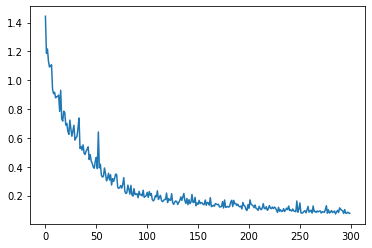

In [23]:
plt.plot(loss_list)

In [12]:
model.predict

<bound method TwoLayerNet.predict of <__main__.TwoLayerNet object at 0x000002C167DFCDC8>>

## 1.5 계산 고속화

### 1.5.1 비트 정밀도
- 넘파이의 부동소수점 type은 기본적으로 64비트 데이터 타입을 사용,
- 하지만 신경망의 추론과 학습에는 32비트 부동소수점으로도 문제없이 수행 가능
    - 메모리 관점에 뚜렷하게, 속도 측면에서도 일반적으로 32비트가 더욱 좋음
    - 넘파이에서 32비트 부동소수점을 사용하도록 바꾸어 주는 것이 좋음
- 신경망 추론으로 한정 -> 16비트 부동소수점 수를 사용하더라도 인식률이 거의 떨어지지 않음
    - CPU, GPU는 32비트 연산을 수행 -> 속도 측면에서는 혜택이 없을 수 있음
    - 가중치 데이터를 저장할 때는 16비트로 저장하는 것이 메모리 측면에서 훨씬 좋음
    - 실제 돌아갈 때는 32비트로 바뀌어서 돌아가서 속도측면에서는 상관없겠지만,
        - 요즘 GPU에서는 8비트까지도 지원하기 시작

In [33]:
# 부동소수점 사용(32비트)
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [35]:
# 부동소수점 사용(32비트)
c = np.random.randn(3).astype("f")
c.dtype

dtype('float32')

### 1.5.2 GPU(쿠파이)
- 딥러닝의 계산은 대량의 곱하기 연산으로 구성됨
- 병렬로 계산할수 있기 때문에 GPU가 굉장히 유리
- 쿠파이 : GPU를 이용해 병렬 계산을 수행해주는 라이브러리
    - 넘파이와 비슷하지만 GPU에서만 작동
    - 엔디비아 GPU에서만 동작
    - CUDA라는 GPU 전용 범용 병렬 컴퓨팅, 플랫폼을 설치해야 함
    - 넘파이와 호환되는 API를 제공하기 때문에 넘파이로 작성한 코드를 GPU용으로 변경하기 쉬움
        - numpy를 cupy로 바꾸어 주기만 하면 됨

In [ ]:
import cupy as cp
x = cp.arange(6).reshape(2,3).astype("f")
x
x.sum(axis=1)